# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [4]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    #Setting the intitial data
    x_n = x0
    temp = x0
    i = 0
    #Creating the iteration process using 'while'
    while i == 0 or ((i < maxiter) & (abs(x_n - temp) >= eps)):
        #Computing a derivative at the point x_n
        deriv = fder(x_n)
        #Creating a temporary storage for a previous value of x
        temp = x_n
        #Making sure that we can divide the numbers
        if fder(x_n) == 0:
            raise ValueError("The derivative equals zero at the point x = %s, change the starting point! The number of iterations: %i" % (x_n, i))
        
        #Doing one iteration
        x_n  -= f(x_n) / deriv
        i += 1
        
    return x_n, i

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [5]:
#Setting initial functions
f = lambda x: x**2 - 1
fder = lambda x: 2*x

#Testing the code
x, i = newton_iteration(f, fder, 2, 1e-10)
print('The zero point of the function:', x)
print('The number of iterations:', i)

The zero point of the function: 1.0
The number of iterations: 6


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

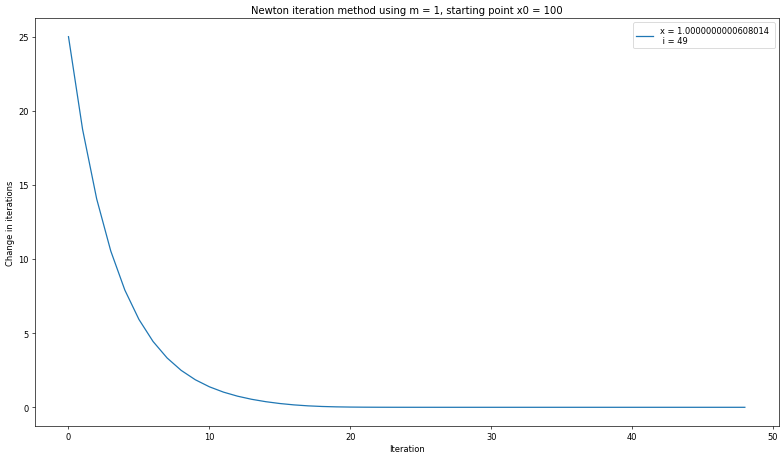

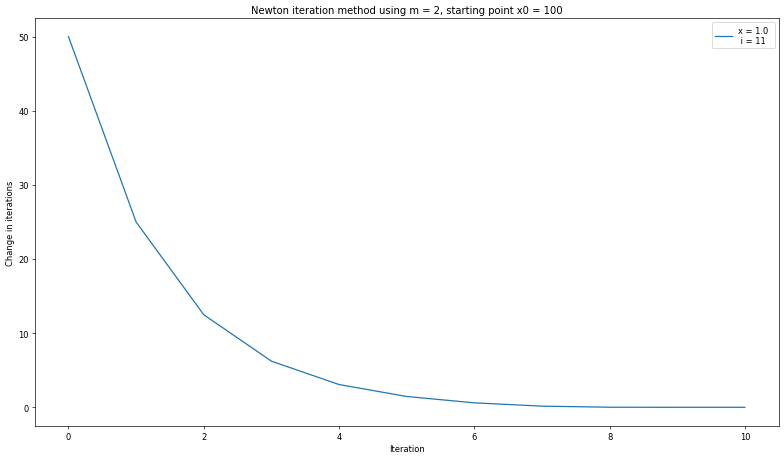

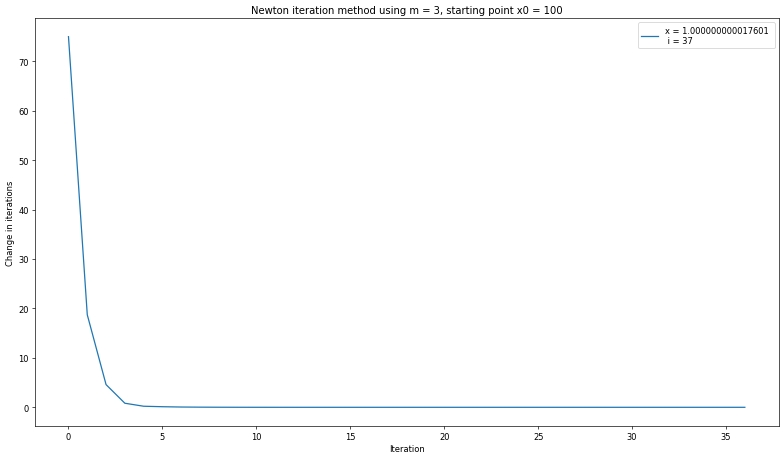

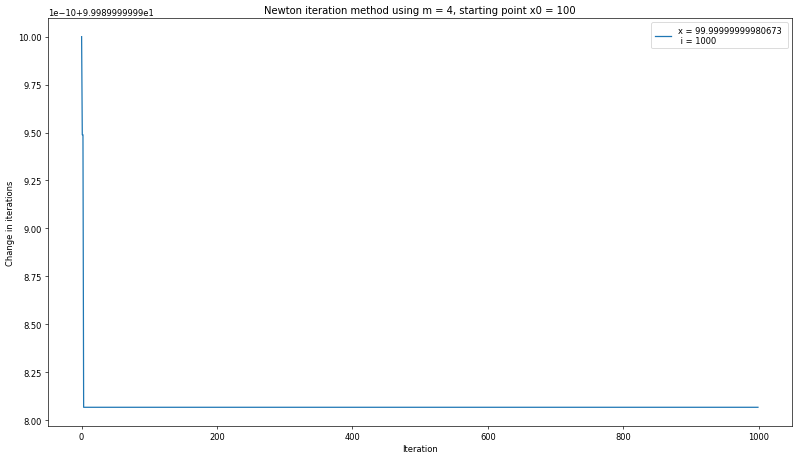

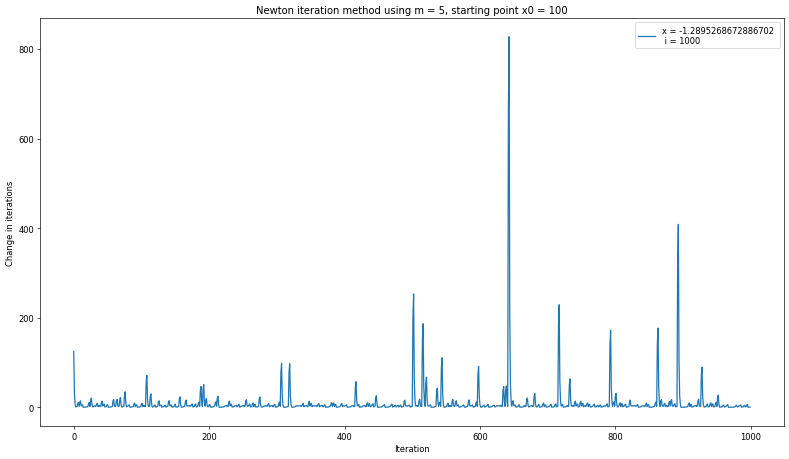

In [6]:
import matplotlib.pyplot as plt

#The same code but with 'm' and whole history of iterations 
#to show it on the graph
def newton_iteration(f, fder, x0, m = 1, eps=1e-5, maxiter=1000):
    #x_n is now a list, so we can append new elements
    x_n = [x0]
    i = 0

    while i == 0 or ((i < maxiter) & (abs(x_n[-1] - x_n[-2]) >= eps)):
        deriv = fder(x_n[-1])
        if fder(x_n[-1]) == 0:
            if f(x_n[-1]) == 0:
                return x_n, i
            raise ValueError('The derivative equals zero at the point x = %s, change the starting point! The number of iterations: %i' % (x_n[-1], i))
        
        #Appending the result of a new iteration
        x_n.append(x_n[-1] - m * f(x_n[-1]) / deriv)
        i += 1
        
    return x_n, i

#Setting initial functions
f = lambda x: (x**2 - 1)**2
fder = lambda x: 4*x*(x**2 - 1)
x0 = 100

#Building a graph for each m
for m in range(1, 6):
    x, i = newton_iteration(f, fder, x0, m, 1e-10)
    plt.figure(figsize=(16, 9), dpi= 60, facecolor='w', edgecolor='k')
    plt.title('Newton iteration method using m = %i, starting point x0 = %s' % (m, x0))
    plt.xlabel('Iteration')
    plt.ylabel('Change in iterations')
    plt.plot(range(i), [abs(x[1:][j] - x[:-1][j]) for j in range(i)], label='x = %s \n i = %i' % (x[-1], i))
    plt.legend()
#As a result the confergence is the fastest with m = 2 which is a power number

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

[0.6425172583450743, 0.6417656188174021, 0.641733096984023, 0.6417282374715111, 0.6417196570651832, 0.641718064187697, 0.641714812281244, 0.641714938622188, 0.6417144905877344, 0.641716045414887]


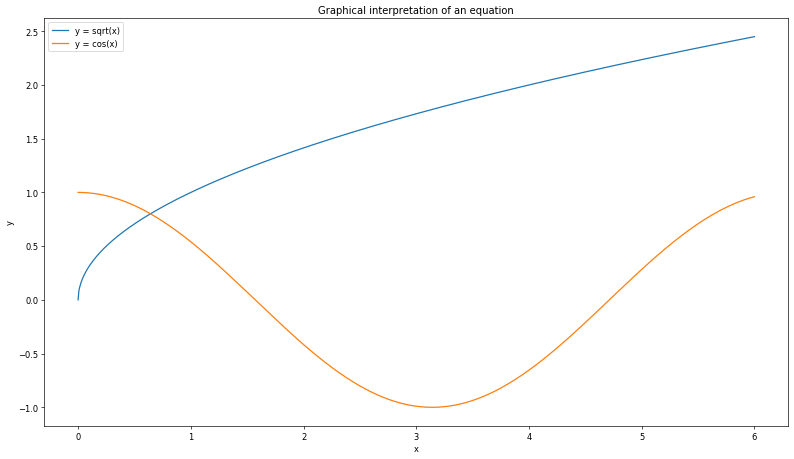

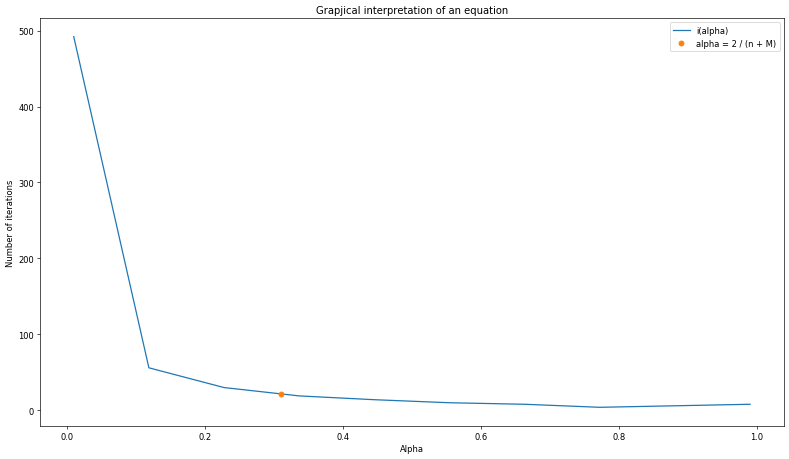

In [7]:
import numpy as np

#Building a graph of y = sqrt(x) and y = cos(x) to get 
#an approximation of a point of the intersection
n = 1000
x = np.linspace(0, 6, n)
y1 = np.sqrt(x)
y2 = np.cos(x)
plt.figure(figsize=(16, 9), dpi= 60, facecolor='w', edgecolor='k')
plt.title('Graphical interpretation of an equation')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y1, label='y = sqrt(x)')
plt.plot(x, y2, label='y = cos(x)')
plt.legend()

#Downgrading the Newton method to the Fixed-point one
def fixed_point(f, x0, alpha = 1, eps=1e-5, maxiter=1000):
    x_n = [x0]
    i = 0

    while i == 0 or ((i < maxiter) & (abs(x_n[-1] - x_n[-2]) >= eps)):
        x_n.append(x_n[-1] - alpha * f(x_n[-1]))
        i += 1
        
    return x_n, i

#Setting initial functions
f = lambda x: np.sqrt(x) - np.cos(x)
fder = lambda x: 1 / (2 * np.sqrt(x)) + np.sin(x)
M = np.max(np.abs(fder(x[1:])))
m = np.min(np.abs(fder(x[1:])))
alpha = np.linspace(0.01, 0.99, 10)
x0 = 1

#Computing the number of iterations for each alpha
I = [fixed_point(f, x0, i)[1] for i in alpha]
#Printing the computed point (just to check the equivalence)
print([fixed_point(f, x0, i)[0][-1] for i in alpha])
#Plotting the result
plt.figure(figsize=(16, 9), dpi= 60, facecolor='w', edgecolor='k')
plt.title('Grapjical interpretation of an equation')
plt.xlabel('Alpha')
plt.ylabel('Number of iterations')
plt.plot(alpha, I, label='i(alpha)')
plt.plot(2 / (m + M), fixed_point(f, x0, 2 / (m + M))[1], 'o', label='alpha = 2 / (n + M)')
plt.legend()
#We can see that this special alpha lays on the right of
#the break down of the number of iterations (slope)

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

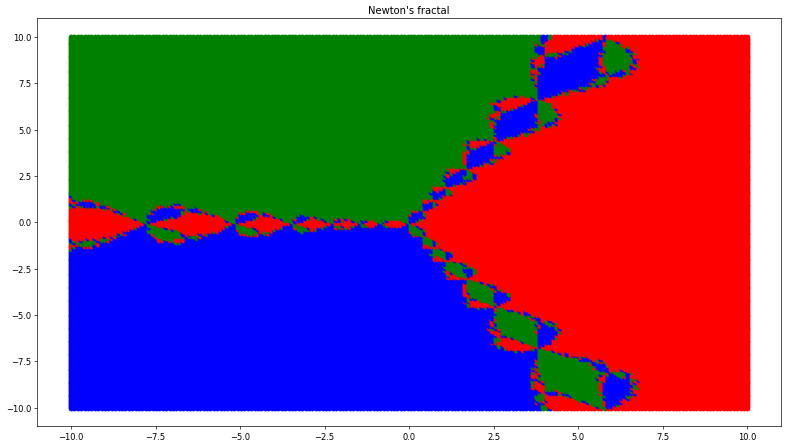

In [26]:
from cmath import e, pi

#ATTENTION! DON'T RUN THIS CODE! IT REQUIRES A SHIT TON OF TIME TO FINISH IT!
f = lambda x: x**3 - 1
fder = lambda x: 3 * x**2
points = [e**(1j * 2 * pi * k / 3) for k in range(3)]
nGrid = 200
eps = 1e-5
x = np.linspace(-10, 10, nGrid)
y = np.linspace(-10, 10, nGrid)

plt.figure(figsize=(16, 9), dpi= 60, facecolor='w', edgecolor='k')
plt.title("Newton's fractal")

for i in x:
    for j in y:
        if i == 0 and j == 0: continue
        res = newton_iteration(f, fder, i + j * 1j, eps = eps)
        if np.abs(res[0][-1] - points[0]) < eps:
            color = 'red'
        elif np.abs(res[0][-1] - points[1]) < eps:
            color = 'green'
        else:
            color = 'blue'
        
        plt.plot(i, j, 'o', color=color)
        
plt.show()